In [117]:
#!/usr/bin/python

import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data,test_classifier
from sklearn.feature_selection import SelectPercentile, f_classif
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
data1 = pd.DataFrame(data_dict)
data1 = data1.T
data1 = data1.replace("NaN",np.NaN)
data1.to_dict('data_dict');


In [118]:
data1.info()
# As features com mais data points(mais de 39) são:
# bonus, deferral_payments, deferred_income, exercised_stock_options, expenses, from_messages, from_poi_to_this_person,
# from_this_person_to_poi, long_term_incentive, other, restricted_stock, salary, shared_receipt_with_poi, to_messages,
# total_payments, total_stock_value  

# director_fees ,loan_advances e restricted_stock_deferred têm muitos valores faltantes(mais de 128 faltantes)

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

In [119]:
data_0 = data1.query("poi==0")
data_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        66 non-null float64
deferral_payments            34 non-null float64
deferred_income              38 non-null float64
director_fees                17 non-null float64
email_address                93 non-null object
exercised_stock_options      90 non-null float64
expenses                     77 non-null float64
from_messages                72 non-null float64
from_poi_to_this_person      72 non-null float64
from_this_person_to_poi      72 non-null float64
loan_advances                3 non-null float64
long_term_incentive          54 non-null float64
other                        75 non-null float64
poi                          128 non-null bool
restricted_stock             93 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       78 non-null float64
shared_receipt_with_poi      72 non-null float64
to

In [120]:
data_1 = data1.query("poi==1")
data_1.info()

# As features têm um desbalanço entre 6 e 7.5 entre POIs e non-POIs, mas será utilizado o parâmetro class_weight='balanced'
# nos modelos para lidar com este problema

# As features selecionadas são:
# poi,bonus, deferral_payments, deferred_income, exercised_stock_options, expenses, from_messages, from_poi_to_this_person,
# from_this_person_to_poi, long_term_incentive, other, restricted_stock, salary, shared_receipt_with_poi, to_messages,
# total_payments, total_stock_value 

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, BELDEN TIMOTHY N to YEAGER F SCOTT
Data columns (total 21 columns):
bonus                        16 non-null float64
deferral_payments            5 non-null float64
deferred_income              11 non-null float64
director_fees                0 non-null float64
email_address                18 non-null object
exercised_stock_options      12 non-null float64
expenses                     18 non-null float64
from_messages                14 non-null float64
from_poi_to_this_person      14 non-null float64
from_this_person_to_poi      14 non-null float64
loan_advances                1 non-null float64
long_term_incentive          12 non-null float64
other                        18 non-null float64
poi                          18 non-null bool
restricted_stock             17 non-null float64
restricted_stock_deferred    0 non-null float64
salary                       17 non-null float64
shared_receipt_with_poi      14 non-null float64
t

In [121]:
features_list = ['poi','bonus','deferral_payments' ,'deferred_income','exercised_stock_options', 'expenses', 'from_messages',
'from_poi_to_this_person','from_this_person_to_poi', 'long_term_incentive','other', 'restricted_stock', 'salary',
'shared_receipt_with_poi', 'to_messages','total_payments', 'total_stock_value']


In [122]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [123]:
### Task 2: Remove outliers

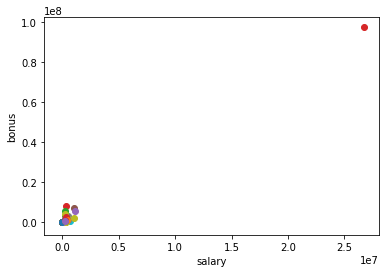

In [124]:

data = featureFormat(data_dict, features_list)
for point in data:
    bonus = point[1]
    salary = point[12]
    plt.scatter( salary, bonus );

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [125]:
import pandas as pd
dic = pd.DataFrame(data_dict)
dic.T.query("bonus!='NaN'").sort_values(by='bonus', ascending=False)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,NaN,311764000,5235198,NaN,NaN,NaN,...,48521928,42667589,False,130322299,-7576788,26704229,NaN,NaN,309886585,434509511
LAVORATO JOHN J,8000000,NaN,NaN,NaN,john.lavorato@enron.com,4158995,49537,2585,528,411,...,2035380,1552,False,1008149,NaN,339288,3962,7259,10425757,5167144
LAY KENNETH L,7000000,202911,-300000,NaN,kenneth.lay@enron.com,34348384,99832,36,123,16,...,3600000,10359729,True,14761694,NaN,1072321,2411,4273,103559793,49110078
SKILLING JEFFREY K,5600000,NaN,NaN,NaN,jeff.skilling@enron.com,19250000,29336,108,88,30,...,1920000,22122,True,6843672,NaN,1111258,2042,3627,8682716,26093672
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
KITCHEN LOUISE,3100000,NaN,NaN,NaN,louise.kitchen@enron.com,81042,5774,1728,251,194,...,NaN,93925,False,466101,NaN,271442,3669,8305,3471141,547143
DELAINEY DAVID W,3000000,NaN,NaN,NaN,david.delainey@enron.com,2291113,86174,3069,66,609,...,1294981,1661,True,1323148,NaN,365163,2097,3093,4747979,3614261
WHALLEY LAWRENCE G,3000000,NaN,NaN,NaN,greg.whalley@enron.com,3282960,57838,556,186,24,...,808346,301026,False,2796177,NaN,510364,3920,6019,4677574,6079137
MCMAHON JEFFREY,2600000,NaN,NaN,NaN,jeffrey.mcmahon@enron.com,1104054,137108,48,58,26,...,694862,297353,False,558801,NaN,370448,2228,2355,4099771,1662855


In [126]:
dic.T.query("salary!='NaN'").sort_values(by='salary', ascending=False)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,NaN,311764000,5235198,NaN,NaN,NaN,...,48521928,42667589,False,130322299,-7576788,26704229,NaN,NaN,309886585,434509511
SKILLING JEFFREY K,5600000,NaN,NaN,NaN,jeff.skilling@enron.com,19250000,29336,108,88,30,...,1920000,22122,True,6843672,NaN,1111258,2042,3627,8682716,26093672
LAY KENNETH L,7000000,202911,-300000,NaN,kenneth.lay@enron.com,34348384,99832,36,123,16,...,3600000,10359729,True,14761694,NaN,1072321,2411,4273,103559793,49110078
FREVERT MARK A,2000000,6426990,-3367011,NaN,mark.frevert@enron.com,10433518,86987,21,242,6,...,1617011,7427621,False,4188667,NaN,1060932,2979,3275,17252530,14622185
PICKERING MARK R,300000,NaN,NaN,NaN,mark.pickering@enron.com,28798,31653,67,7,0,...,NaN,NaN,False,NaN,NaN,655037,728,898,1386690,28798
WHALLEY LAWRENCE G,3000000,NaN,NaN,NaN,greg.whalley@enron.com,3282960,57838,556,186,24,...,808346,301026,False,2796177,NaN,510364,3920,6019,4677574,6079137
DERRICK JR. JAMES V,800000,NaN,-1284000,NaN,james.derrick@enron.com,8831913,51124,909,64,20,...,484000,7482,False,1787380,-1787380,492375,1401,2181,550981,8831913
FASTOW ANDREW S,1300000,NaN,-1386055,NaN,andrew.fastow@enron.com,NaN,55921,NaN,NaN,NaN,...,1736055,277464,True,1794412,NaN,440698,NaN,NaN,2424083,1794412
SHERRIFF JOHN R,1500000,NaN,NaN,NaN,john.sherriff@enron.com,1835558,NaN,92,28,23,...,554422,1852186,False,1293424,NaN,428780,2103,3187,4335388,3128982
RICE KENNETH D,1750000,NaN,-3504386,NaN,ken.rice@enron.com,19794175,46950,18,42,4,...,1617011,174839,True,2748364,NaN,420636,864,905,505050,22542539


In [127]:
# O valor TOTAL deve ser removido, é um outlier que mostra a soma para todos os funcionários
data_dict.pop('TOTAL');

In [128]:
# https://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe

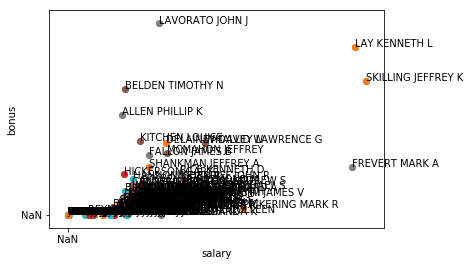

In [129]:
data = featureFormat(data_dict, features_list)
fig, ax = plt.subplots()
for key,value in data_dict.iteritems():
    bonus = value['bonus']
    salary = value['salary']
    plt.scatter( salary, bonus )
    ax.scatter( salary, bonus)
    ax.annotate(key, (salary, bonus))

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [130]:
data1 = pd.DataFrame(data_dict)
data1 = data1.T
data1 = data1.replace("NaN",np.NaN)
data1.apply(lambda x: sum(x.isnull().values), axis = 1).sort_values( ascending=False)

LOCKHART EUGENE E                20
WROBEL BRUCE                     18
WHALEY DAVID A                   18
GRAMM WENDY L                    18
THE TRAVEL AGENCY IN THE PARK    18
GILLIS JOHN                      17
WODRASKA JOHN                    17
SAVAGE FRANK                     17
SCRIMSHAW MATTHEW                17
CLINE KENNETH W                  17
WAKEHAM JOHN                     17
CHAN RONNIE                      16
MENDELSOHN JOHN                  16
PEREIRA PAULO V. FERRAZ          16
BLAKE JR. NORMAN P               16
YEAP SOON                        16
GATHMANN WILLIAM D               16
URQUHART JOHN A                  16
FUGH JOHN L                      16
LOWRY CHARLES P                  16
MEYER JEROME J                   16
WINOKUR JR. HERBERT S            16
CHRISTODOULOU DIOMEDES           16
NOLES JAMES L                    15
LEMAISTRE CHARLES                15
WALTERS GARETH W                 15
GRAY RODNEY                      15
BADUM JAMES P               

In [131]:
# 'LOCKHART EUGENE E' será retirado pois possui 20 colunas nulas
# 'THE TRAVEL AGENCY IN THE PARK' será retirado pois não é um funcionário
data_dict.pop('LOCKHART EUGENE E');
data_dict.pop('THE TRAVEL AGENCY IN THE PARK');

In [132]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
# O número total de emails enviados por alguém à uma pessoa de interesse não é útil, nem
# o número de emails enviados por pessoas de interesse à outras pessoas.É interessante
# saber o percentual de emails enviados à POIs em relação ao total de emails enviados
# por uma pessoa, assim como o percentual de emails recebidos de POIs em relação ao total 
# de emails recebidos por alguém.
# Foram criadas as features: fraction_from_poi, fraction_to_poi

my_dataset = data_dict
def computeFraction( poi_messages, all_messages ):
    if (poi_messages=='NaN' or all_messages=='NaN'):
        fraction = 0
    elif (poi_messages=='' or all_messages==''):
        fraction = ''
    else:
        fraction= float(poi_messages)/float(all_messages)
    return fraction

for name,value in my_dataset.items():
    data_point = my_dataset[name]
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
        
    value['fraction_from_poi'] = fraction_from_poi
    value['fraction_to_poi'] = fraction_to_poi
features_list.insert(5,'fraction_from_poi')
features_list.insert(6,'fraction_to_poi')

In [133]:
my_dataset = data_dict
features_list

['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'exercised_stock_options',
 'fraction_from_poi',
 'fraction_to_poi',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [134]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
my_dataset['ALLEN PHILLIP K']

{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'fraction_from_poi': 0.016195727084769126,
 'fraction_to_poi': 0.029612756264236904,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}

In [135]:
features[0]

array([  4.17500000e+06,   2.86971700e+06,  -3.08105500e+06,
         1.72954100e+06,   1.61957271e-02,   2.96127563e-02,
         1.38680000e+04,   2.19500000e+03,   4.70000000e+01,
         6.50000000e+01,   3.04805000e+05,   1.52000000e+02,
         1.26027000e+05,   2.01955000e+05,   1.40700000e+03,
         2.90200000e+03,   4.48444200e+06,   1.72954100e+06])

In [136]:
features_list

['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'exercised_stock_options',
 'fraction_from_poi',
 'fraction_to_poi',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [137]:
len(labels)

143

In [138]:
len(features)

143

In [139]:
len(my_dataset)

143

In [140]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Scale de features
from sklearn.preprocessing import MinMaxScaler
import numpy
weights = features
scaler = MinMaxScaler()
features = scaler.fit_transform(weights)

# Selecionar features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=12).fit(features,labels)
# Mostrar scores de todas as features
a = selector.scores_
j = 0
for i in features_list[1:]:
    print i,a[j]
    j=j+1
features = SelectKBest(chi2, k=12).fit_transform(features,labels)

# Colocar em features_list as features selecionadas
# https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
idxs_selected = selector.get_support(indices=True)
nlist = []
nlist.append('poi')
for i in idxs_selected:
    nlist.append(features_list[i+1])
features_list = nlist
features_list

# Testar Classificadores

# Naive Bayes
#from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
import sklearn.pipeline
from sklearn import decomposition
clf = RandomForestClassifier(class_weight="balanced",random_state=42)



bonus 5.12075413709
deferral_payments 0.0606966069314
deferred_income 0.340099218406
exercised_stock_options 6.84550933503
fraction_from_poi 0.827233463219
fraction_to_poi 4.64457200336
expenses 1.48610336666
from_messages 0.0687385421513
from_poi_to_this_person 1.37005929223
from_this_person_to_poi 1.0008076418
long_term_incentive 2.53848503308
other 1.7159505308
restricted_stock 0.589535349487
salary 3.05278674479
shared_receipt_with_poi 2.43221986514
to_messages 0.436397768802
total_payments 2.78477883965
total_stock_value 5.47661009929


In [141]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
features_train, features_test, labels_train, labels_test = train_test_split(features, labels,stratify=labels, test_size=0.3, random_state=42)



# Random Forest tunning
from sklearn.model_selection import GridSearchCV
import time
t0= time.time()
params = {"max_depth": [3,4,5,6],
              "max_features": [2,3,4],
              "min_samples_split": [0.1,0.2, 0.3],
              "criterion": ["gini", "entropy"],
               "n_estimators":[5,10,15]}

estimator = GridSearchCV(clf, param_grid=params)
estimator.fit(features_train, labels_train)
clf = estimator.best_estimator_

pred = clf.predict(features_test) 

# Tester
test_classifier(clf,my_dataset,features_list)
print "runtime:",round(time.time()-t0,3),"s"

# Cross Validation Score
scores =cross_val_score(clf, features,labels, cv=5, scoring='precision')
print "Cross Validation Score-Precision:",round(scores.mean(),2)
scores =cross_val_score(clf, features,labels, cv=5, scoring='recall')
print "Cross Validation Score-Recall:",round(scores.mean(),2)



RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features=2,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
	Accuracy: 0.86353	Precision: 0.48884	Recall: 0.51450	F1: 0.50134	F2: 0.50915
	Total predictions: 15000	True positives: 1029	False positives: 1076	False negatives:  971	True negatives: 11924

runtime: 116.998 s
Cross Validation Score-Precision: 0.53
Cross Validation Score-Recall: 0.45


In [142]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [143]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features=2,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)